In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [3]:
data = pd.read_csv('fer2013.csv')

In [4]:
pixels = data['pixels'].apply(lambda x: np.fromstring(x, sep=' '))
x = np.vstack(pixels.values)
y = data['emotion']

In [5]:
x = x / 255.0

In [6]:
x = x.reshape(-1, 48, 48, 1)

In [7]:
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10


1010/1010 [==============================] - 62s 61ms/step - loss: 1.6401 - accuracy: 0.3539 - val_loss: 1.4868 - val_accuracy: 0.4324
Epoch 2/10
1010/1010 [==============================] - 59s 58ms/step - loss: 1.4471 - accuracy: 0.4426 - val_loss: 1.3645 - val_accuracy: 0.4884
Epoch 3/10
1010/1010 [==============================] - 69s 68ms/step - loss: 1.3599 - accuracy: 0.4776 - val_loss: 1.3310 - val_accuracy: 0.4960
Epoch 4/10
1010/1010 [==============================] - 68s 67ms/step - loss: 1.2792 - accuracy: 0.5078 - val_loss: 1.3026 - val_accuracy: 0.5035
Epoch 5/10
1010/1010 [==============================] - 65s 65ms/step - loss: 1.2177 - accuracy: 0.5353 - val_loss: 1.2733 - val_accuracy: 0.5099
Epoch 6/10
1010/1010 [==============================] - 64s 64ms/step - loss: 1.1538 - accuracy: 0.5617 - val_loss: 1.2786 - val_accuracy: 0.5160
Epoch 7/10
1010/1010 [==============================] - 64s 63ms/step - loss: 1.1026 - accuracy: 0.5794 - val_loss: 1.2699

In [12]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

113/113 [==============================] - 1s 10ms/step


In [13]:
print(confusion_matrix(y_test_class, y_pred_class))

[[172   0  56  53 111  21  85]
 [ 12  13  10   4  10   0   3]
 [ 53   0 188  54 136  57  57]
 [ 31   0  25 652  92  21  60]
 [ 47   0  52  67 317  10  95]
 [ 14   0  37  29  30 292  12]
 [ 32   0  45  80 127  18 309]]


In [14]:
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.8380515172908961


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

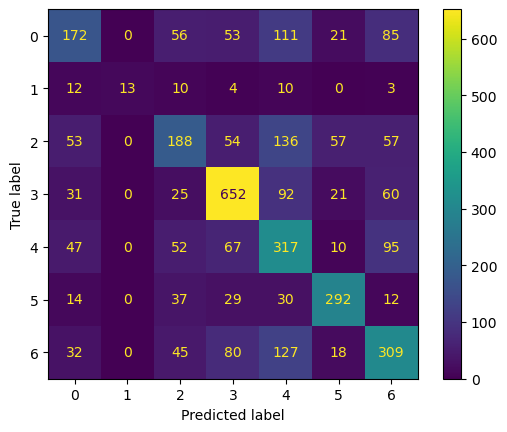

In [16]:
cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

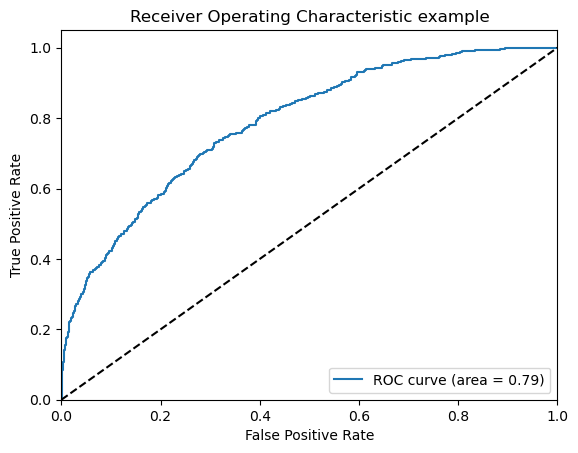

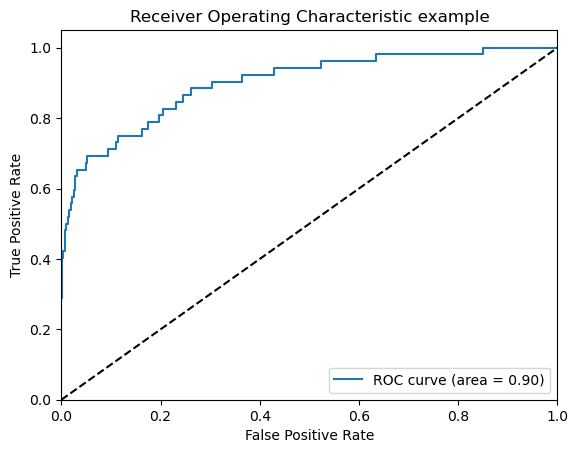

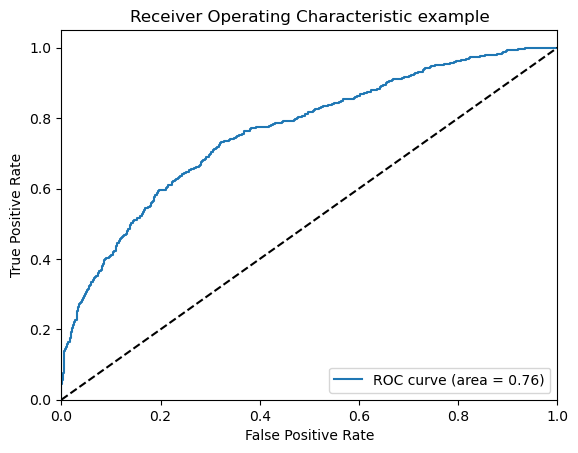

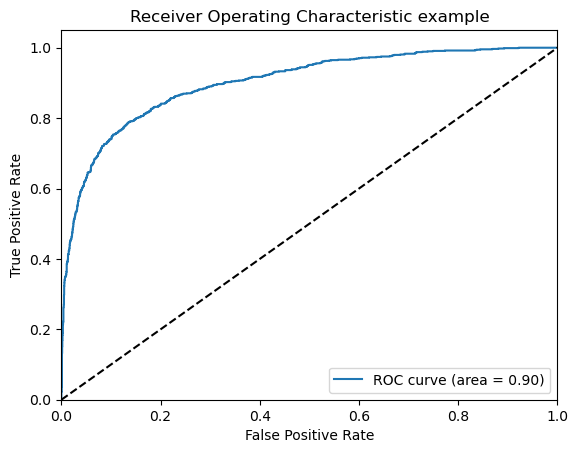

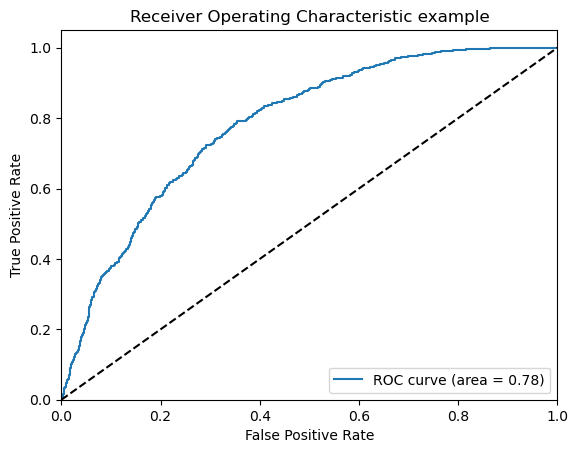

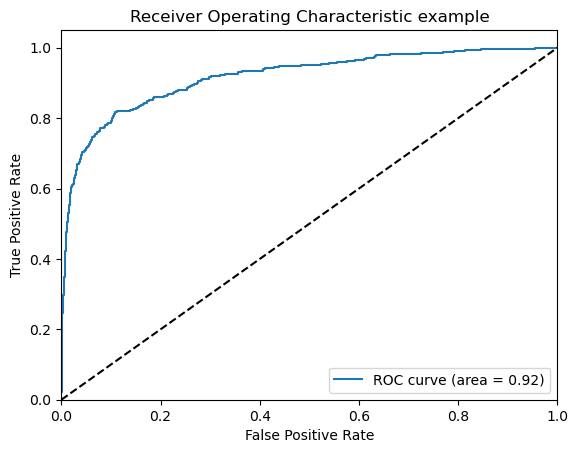

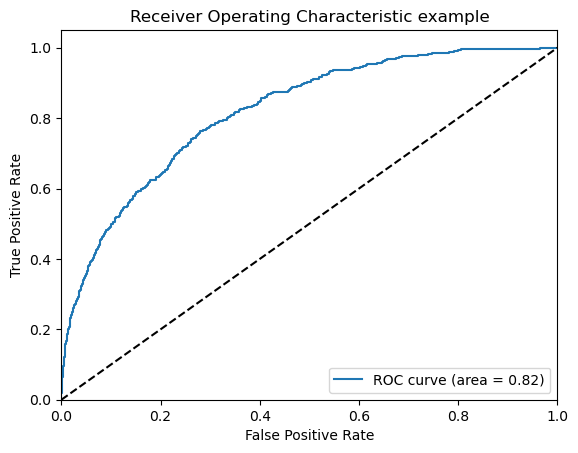

In [20]:
for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(loc="lower right")
    plt.show()